# Ice Cream Revenue

Se creará un modelo para predecir las ventas de un negocio de helados, tomando como referencia los cambios de temperatura en centigrados, a través de una regresión Lineal:

- X (variable Independiente): temperatura
- Y (varuable Dependiente): Ingresos diarios en dólares

## Paso 1: Importación de Librerías

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Paso 2: Importación de Dataset

In [8]:
IceCream = pd.read_csv("IceCreamData.csv")
IceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [9]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [10]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Paso 3: Visualización de Dataset

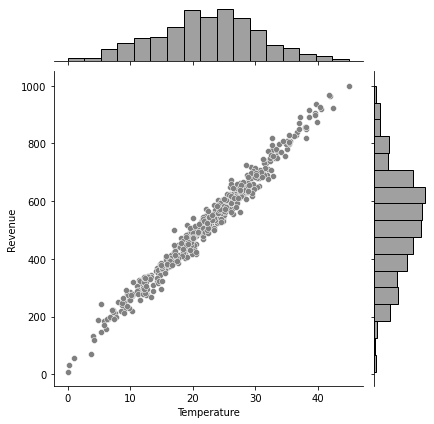

In [11]:
sns.jointplot(x='Temperature', y='Revenue', data=IceCream, color='gray'); 

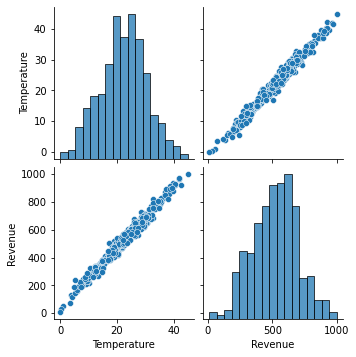

In [12]:
sns.pairplot(IceCream);

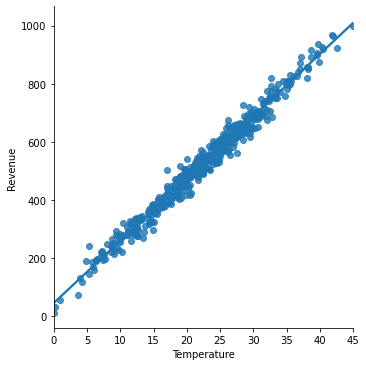

In [13]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream);

## Paso 4: Creando los modelos de test y entrenamiento

In [14]:
X = IceCream[['Temperature']]
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [15]:
y = IceCream['Revenue']
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

In [17]:
X_train

,Temperature
436,17.188948
400,24.240372
372,19.617875
188,16.555843
261,23.577113
...,...
296,24.521847
34,35.628925
236,23.410861
371,0.267028


In [18]:
print('X_train.shape: ',X_train.shape)
print('X_test.shape: ',X_test.shape)
print('y_train.shape: ',y_train.shape)
print('y_test.shape: ',y_test.shape)

X_train.shape:  (350, 1)
X_test.shape:  (150, 1)
y_train.shape:  (350,)
y_test.shape:  (150,)


## Paso 5: Entrenando el modelo

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression (fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
print('Coeficiente: ', regressor.coef_)
print('Interceptor: ', regressor.intercept_)

Coeficiente:  [21.44933948]
Interceptor:  44.02091081354462


## Paso 6: Probando el Modelo

In [ ]:
from sklearn.metrics import r2_score
test_x = np.array()

In [21]:
X_test.shape

(150, 1)

In [22]:
y_predict = regressor.predict(X_test)
y_predict

array([329.33565638, 579.17582177, 469.03181604, 157.86343768,
       797.3249611 , 580.00813765, 478.24455337, 676.95219349,
       627.19664482, 745.76566626, 412.93732412, 367.96860995,
       399.17795765, 620.47089985, 422.78412151, 231.82175954,
       736.77733364, 692.3937671 , 511.10061168, 416.39714462,
       598.82830954, 896.93520287, 307.22504234, 385.42313672,
       407.68969624, 631.20518039, 564.01966359, 329.95359919,
       740.69104575, 472.64022576, 620.14422534, 493.05441733,
       422.74845319, 589.32633495, 441.01301598, 692.80440677,
       316.1793458 , 435.11160451, 589.24814718, 393.69994156,
       310.70354178, 689.2404079 , 656.35638415, 523.67967077,
       553.68801632, 307.8824247 , 519.57848199, 199.77203764,
       462.17027508, 433.52411595, 717.80104895, 393.64782481,
       522.00979572, 447.52211061, 359.02471993, 429.95930973,
       484.94809956, 638.75530949, 292.18212552, 232.58104192,
       254.492779  , 469.77401445, 419.75057704, 804.57

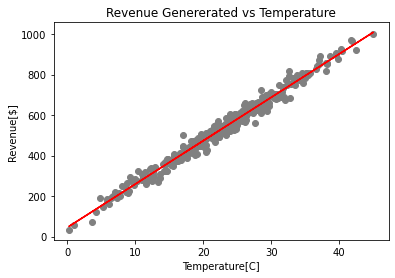

In [23]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.ylabel('Revenue[$]')
plt.xlabel('Temperature[C]')
plt.title('Revenue Genererated vs Temperature');

## Paso 7: Prediciendo Nuevas Temperaturas

In [37]:
T = [[10],[20],[30]]
revenue = regressor.predict(T)

In [38]:
revenue

array([258.51430558, 473.00770035, 687.50109512])